In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.describe()  # satatistical sammury

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df["region"].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


Text(0.5, 1.0, 'Age Distribution with KDE')

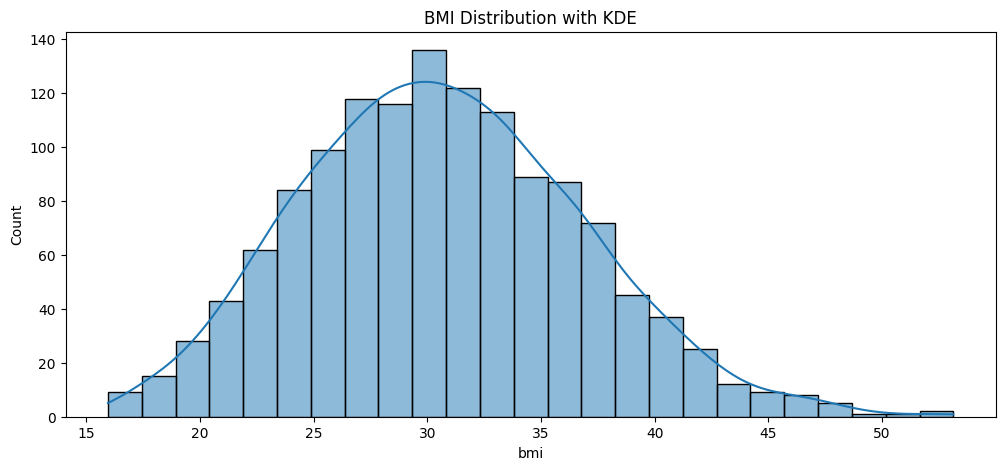

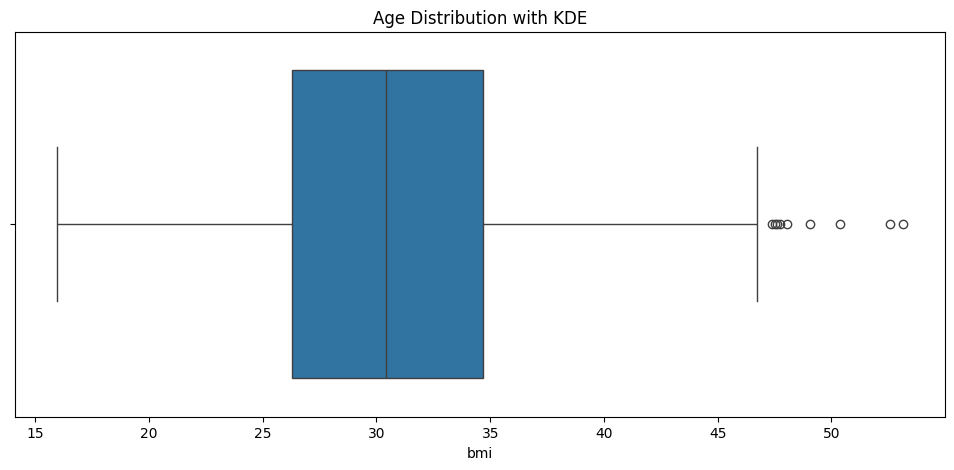

In [10]:
plt.figure(figsize=(12,5))
sns.histplot(df["bmi"],kde=True)
plt.title("BMI Distribution with KDE")




plt.figure(figsize=(12,5))
sns.boxplot(x= df["bmi"])
plt.title("Age Distribution with KDE")


In [13]:
# remove the outliers

Q1 = df["bmi"].quantile(0.25)
Q3 = df["bmi"].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"lower :{lower_bound},upper :{upper_bound}")



lower :13.7,upper :47.290000000000006


In [14]:
# below Df_cleaned Outliers
df_cleaned = df[(df["bmi"]>= lower_bound) & (df["bmi"]<= upper_bound)]

Text(0.5, 1.0, 'Age Distribution with KDE')

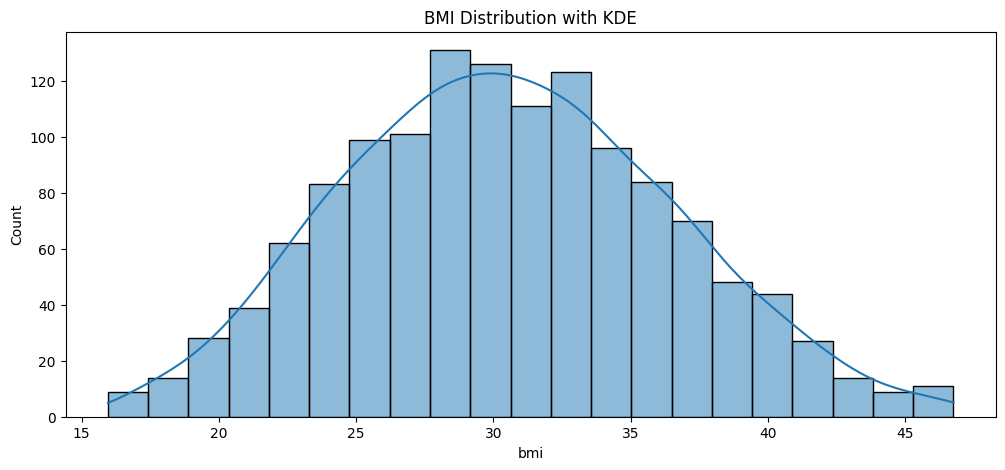

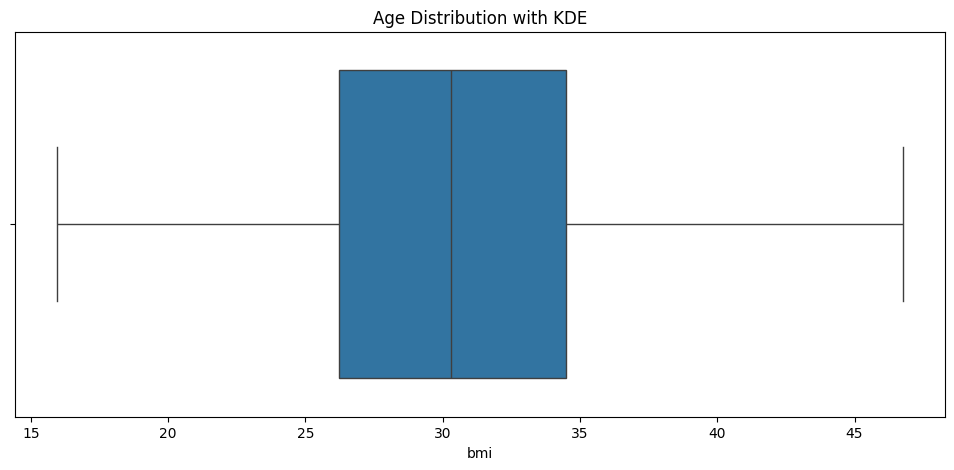

In [15]:
plt.figure(figsize=(12,5))
sns.histplot(df_cleaned["bmi"],kde=True)
plt.title("BMI Distribution with KDE")




plt.figure(figsize=(12,5))
sns.boxplot(x= df_cleaned["bmi"])
plt.title("Age Distribution with KDE")


In [17]:
df_cleaned= pd.get_dummies(df_cleaned,drop_first=True)
df_cleaned

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [18]:
df_cleaned.corr()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.114686,0.043041,0.302022,-0.019143,-0.024505,-0.000283,-0.011581,0.010474
bmi,0.114686,1.000000,0.017355,0.193196,0.039958,-0.002871,-0.128598,0.255863,0.000651
children,0.043041,0.017355,1.000000,0.069739,0.019281,0.007577,0.024209,-0.018816,0.020021
charges,0.302022,0.193196,0.069739,1.000000,0.063394,0.785912,-0.037704,0.071597,-0.045906
sex_male,-0.019143,0.039958,0.019281,0.063394,1.000000,0.079854,-0.009961,0.010263,-0.001195
smoker_yes,-0.024505,-0.002871,0.007577,0.785912,0.079854,1.000000,-0.035940,0.068270,-0.039440
region_northwest,-0.000283,-0.128598,0.024209,-0.037704,-0.009961,-0.035940,1.000000,-0.344807,-0.323046
region_southeast,-0.011581,0.255863,-0.018816,0.071597,0.010263,0.068270,-0.344807,1.000000,-0.344105
region_southwest,0.010474,0.000651,0.020021,-0.045906,-0.001195,-0.039440,-0.323046,-0.344105,1.000000


<Axes: >

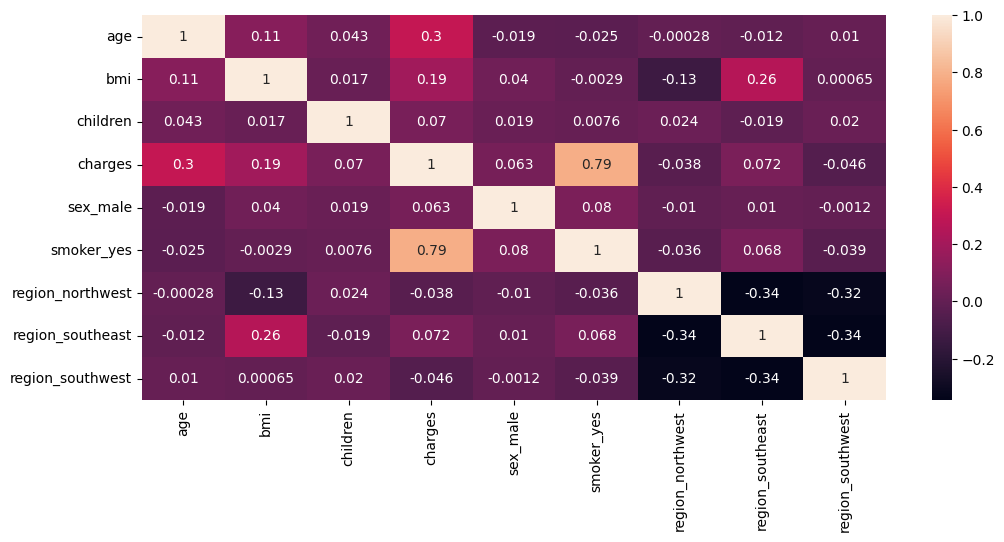

In [19]:
plt.figure(figsize=(12,5))
sns.heatmap(df_cleaned.corr(),annot=True)

In [20]:
x = df_cleaned[["age","bmi","smoker_yes"]]
y = df_cleaned["charges"]

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
# train the model
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [23]:
y_pred = model.predict(x_test)  # unknown  to the model
y_train_pred = model.predict(x_train) # known  to the model

In [26]:
print(f" Testing results : {r2_score(y_test,y_pred)}")
print(f" Training results : {r2_score(y_train,y_train_pred)}")

 Testing results : 0.7676151909783573
 Training results : 0.7408742592932094


In [28]:
model.predict([[23,20,0]])

array([841.4811265])